# 城市气候与海洋的关系研究

导入包

In [2]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
%matplotlib inline


from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

导入数据各个海滨城市数据

In [8]:
ferrara1 = pd.read_csv('./ferrara_150715.csv')
ferrara2 = pd.read_csv('./ferrara_250715.csv')
ferrara3 = pd.read_csv('./ferrara_270615.csv')
ferrara=pd.concat([ferrara1,ferrara1,ferrara1],ignore_index=True)

torino1 = pd.read_csv('./torino_150715.csv')
torino2 = pd.read_csv('./torino_250715.csv')
torino3 = pd.read_csv('./torino_270615.csv')
torino = pd.concat([torino1,torino2,torino3],ignore_index=True) 

mantova1 = pd.read_csv('./mantova_150715.csv')
mantova2 = pd.read_csv('./mantova_250715.csv')
mantova3 = pd.read_csv('./mantova_270615.csv')
mantova = pd.concat([mantova1,mantova2,mantova3],ignore_index=True) 

milano1 = pd.read_csv('./milano_150715.csv')
milano2 = pd.read_csv('./milano_250715.csv')
milano3 = pd.read_csv('./milano_270615.csv')
milano = pd.concat([milano1,milano2,milano3],ignore_index=True) 

ravenna1 = pd.read_csv('./ravenna_150715.csv')
ravenna2 = pd.read_csv('./ravenna_250715.csv')
ravenna3 = pd.read_csv('./ravenna_270615.csv')
ravenna = pd.concat([ravenna1,ravenna2,ravenna3],ignore_index=True)

asti1 = pd.read_csv('./asti_150715.csv')
asti2 = pd.read_csv('./asti_250715.csv')
asti3 = pd.read_csv('./asti_270615.csv')
asti = pd.concat([asti1,asti2,asti3],ignore_index=True)

bologna1 = pd.read_csv('./bologna_150715.csv')
bologna2 = pd.read_csv('./bologna_250715.csv')
bologna3 = pd.read_csv('./bologna_270615.csv')
bologna = pd.concat([bologna1,bologna2,bologna3],ignore_index=True)

piacenza1 = pd.read_csv('./piacenza_150715.csv')
piacenza2 = pd.read_csv('./piacenza_250715.csv')
piacenza3 = pd.read_csv('./piacenza_270615.csv')
piacenza = pd.concat([piacenza1,piacenza2,piacenza3],ignore_index=True)

cesena1 = pd.read_csv('./cesena_150715.csv')
cesena2 = pd.read_csv('./cesena_250715.csv')
cesena3 = pd.read_csv('./cesena_270615.csv')
cesena = pd.concat([cesena1,cesena2,cesena3],ignore_index=True)

faenza1 = pd.read_csv('./faenza_150715.csv')
faenza2 = pd.read_csv('./faenza_250715.csv')
faenza3 = pd.read_csv('./faenza_270615.csv')
faenza = pd.concat([faenza1,faenza2,faenza3],ignore_index=True)

去除没用的列

In [16]:
cesena.head(1)

,temp,humidity,pressure,description,dt,wind_speed,wind_deg,city,day,dist
0,29.15,83,1015,moderate rain,1436863101,3.62,94.001,Cesena,2015-07-14 10:38:21,14


In [15]:
city_list = [ferrara,torino,mantova,milano,ravenna,asti,bologna,piacenza,cesena,faenza]
for city in city_list:
    city.drop('Unnamed: 0',axis=1,inplace=True)

显示最高温度于离海远近的关系（观察多个城市）

In [21]:
city_max_temp = []
city_dist = []
for city in city_list:
    temp = city['temp'].max()
    dist = city['dist'].max()
    city_max_temp.append(temp)
    city_dist.append(dist)
    

In [24]:
city_dist
#city_max_temp

[47, 357, 121, 250, 8, 315, 71, 200, 14, 37]

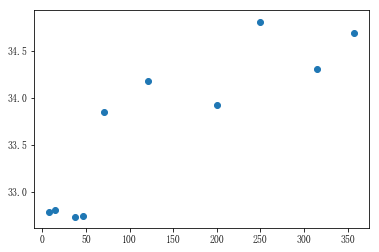

In [25]:
plt.scatter(city_dist,city_max_temp)

观察发现，离海近的可以形成一条直线，离海远的也能形成一条直线。

    - 分别以100公里和50公里为分界点，划分为离海近和离海远的两组数据(近海：小于100  远海：大于50)

In [35]:
city_dist = np.array(city_dist)
city_max_temp = np.array(city_max_temp)

In [36]:
condition = city_dist < 100
near_city_dist = city_dist[condition]
near_city_temp = city_max_temp[condition]

In [38]:
from sklearn.linear_model import LinearRegression
l = LinearRegression()
l.fit(near_city_dist.reshape(-1,1),near_city_temp)
l.predict(89)

array([33.74207562])

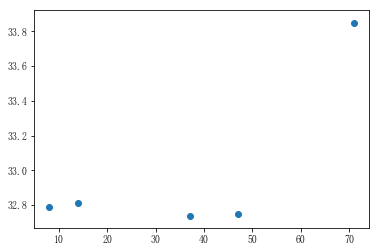

In [39]:
plt.scatter(near_city_dist,near_city_temp)

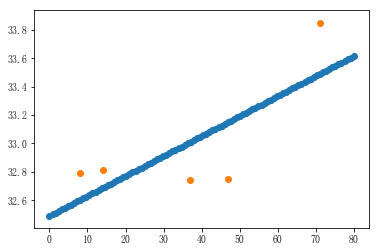

In [43]:
x = np.linspace(0,80,100)
y = l.predict(x.reshape(-1,1))
plt.scatter(x,y)
plt.scatter(near_city_dist,near_city_temp)

导入sklearn，建立线性回归算法模型对象

样本集：用于对机器学习算法模型对象进行训练。样本集通常为一个DataFrame。
    - 特征数据：特征数据的变化会影响目标数据的变化。通常为多列。
    - 目标数据：结果。通常为一列。

使用样本数据对模型进行训练

对模型进行精准度的评分

使用模型进行预测

将远海城市的数据带入到散点图中进行展示，并且进行线性回归

将近海城市的数据带入到散点图中进行展示，并且进行线性回归

将近海和远海的散点图合并显示

查看最低温度与海洋距离的关系

最低湿度与海洋距离的关系

最高湿度与海洋距离的关系

平均湿度与海洋距离的关系